In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install wordcloud

In [3]:
os.chdir('C:\\Users\\mohit\\Downloads\\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform')

In [4]:
review_data=pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [5]:
review_data

Product ID        Category Subcategory1 SubCategory2   Location  \
0             767       Initmates     Intimate    Intimates     Mumbai   
1            1080         General      Dresses      Dresses  Bangalore   
2            1077         General      Dresses      Dresses    Gurgaon   
3            1049  General Petite      Bottoms        Pants    Chennai   
4             847         General         Tops      Blouses  Bangalore   
...           ...             ...          ...          ...        ...   
23481        1104  General Petite      Dresses      Dresses    Gurgaon   
23482         862  General Petite         Tops        Knits    Gurgaon   
23483        1104  General Petite      Dresses      Dresses    Gurgaon   
23484        1084         General      Dresses      Dresses    Gurgaon   
23485        1104  General Petite      Dresses      Dresses    Chennai   

      Channel  Customer Age  \
0      Mobile            33   
1      Mobile            34   
2      Mobile            60   
3         Web            50   
4         Web            47   
...       ...           ...   
23481  Mobile            34   
23482     Web            48   
23483     Web            31   
23484     Web            28   
23485  Mobile            52   

                                            Review Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommend Flag  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1  
...               ...  
23481               1  
23482               1  
23483               0  
23484               1  
23485               1  

[23486 rows x 11 columns]

In [6]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [7]:
review_data.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

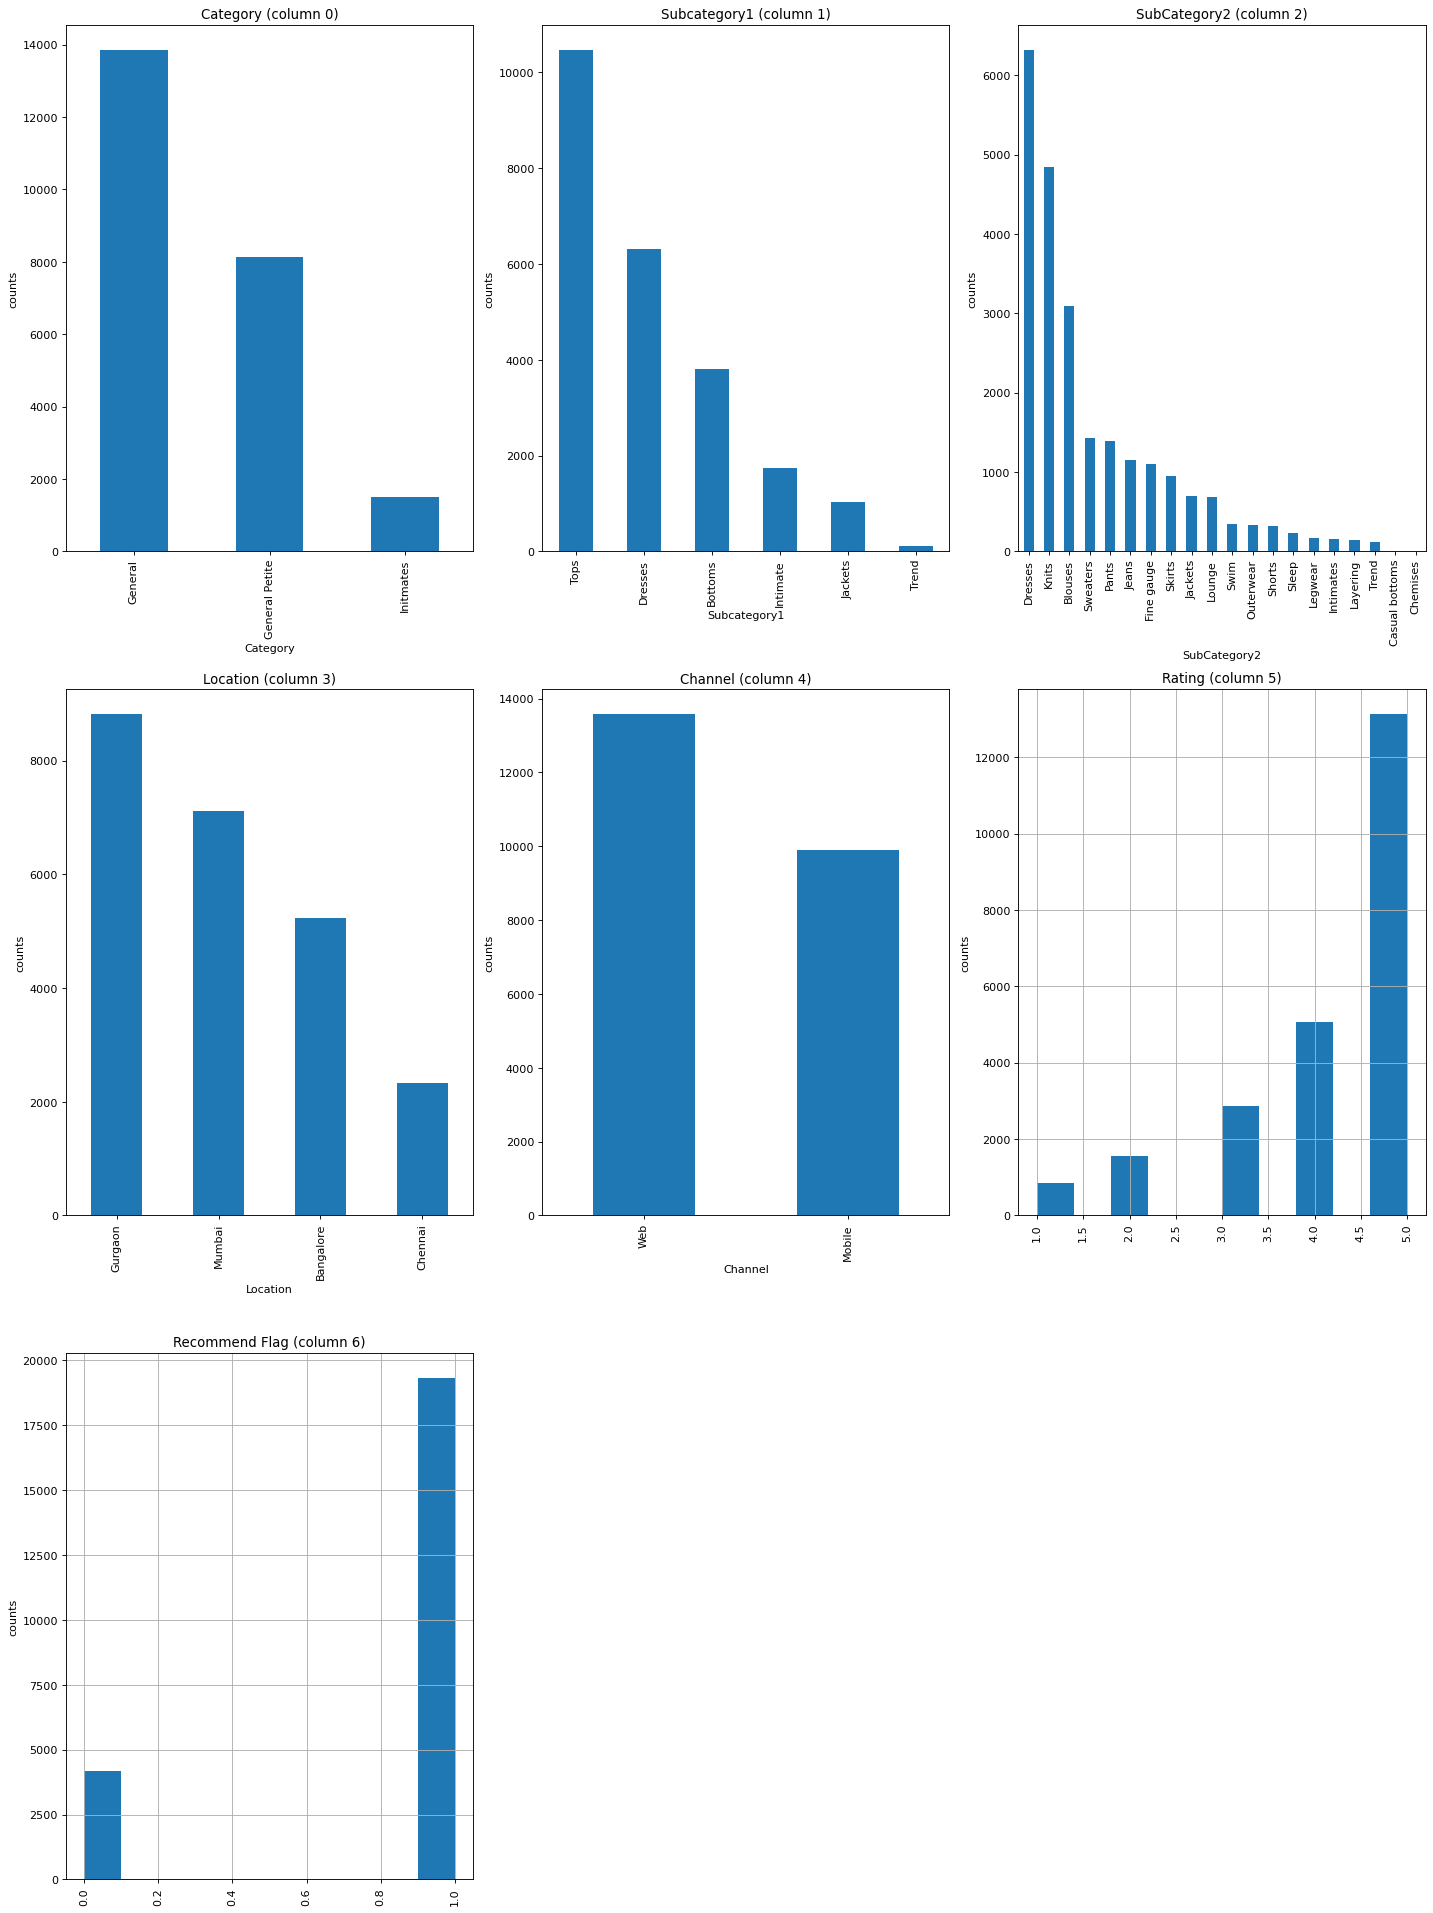

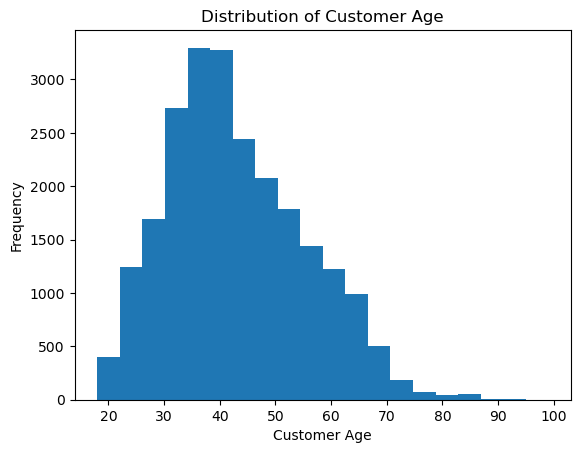

In [9]:
plotPerColumnDistribution(review_data,10,3)
#plotPerColumnDistribution(data[['Customer Age']], 1, 1)
plt.hist(review_data['Customer Age'], bins=20)  
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

#### Data pre_processing,predictive_analysis and model_building

In [11]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [12]:
review_data.drop(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title',
       'Recommend Flag'],axis=1,inplace=True)

In [13]:
review_data

Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      I love, love, love this jumpsuit. it's fun, fl...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[23486 rows x 2 columns]

In [14]:
review_data.isna().sum()

Review Text    845
Rating           0
dtype: int64

In [15]:
review_data.dropna(subset='Review Text',inplace=True)

In [16]:
review_data.isna().sum()

Review Text    0
Rating         0
dtype: int64

In [17]:
review_data.duplicated().sum()

7

In [18]:
review_data.drop_duplicates(keep='first')

Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      I love, love, love this jumpsuit. it's fun, fl...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[22634 rows x 2 columns]

In [19]:
review_data['Rating'].value_counts()

Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

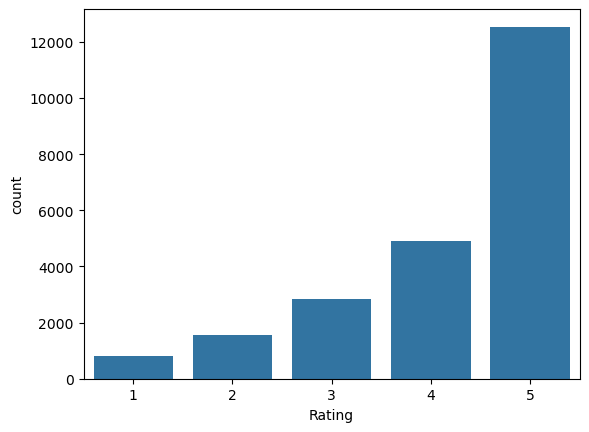

In [20]:
sns.countplot(x=review_data['Rating'])
plt.show()

#### Text Processing

In [22]:
!pip install contractions

In [23]:
!pip install nltk

In [24]:
import re
import nltk
import contractions
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer
ss= SnowballStemmer('english')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('woerdnet')
import contractions 
import warnings 
warnings.filterwarnings('ignore')
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
def lower_case(x):
    x=x.lower()
    return x

def expanding_contractions(x):
    x=contractions.fix(x)
    return x

def removing_special_char(x):
    x = re.sub(r'[.3]',' ',x)
    x = re.sub('[^\w\s]', '', x)
    x = re.sub(r'http:\/\/\w+.com\/\w\/\w+','',x)
    x = re.sub(r'@\w+','',x)
    x = re.sub(r'[^a-zA-Z\s]','',x)
    return x

def steming(x):
    l=x.split(' ')
    l=[ss.stem(word) for word in l]
    x=' '.join(l)
    return x

def removing_stopword(x):
    l=x.split(' ')
    l=[w for w in l if w not in stop_words]
    x=' '.join(l)
    return x
    

In [26]:
def data_proccesing(x):
    x=lower_case(x)
    x=removing_stopword(x)
    x=expanding_contractions(x)
    x=removing_special_char(x)
    x=steming(x)
    return x

In [27]:
review_data

Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      I love, love, love this jumpsuit. it's fun, fl...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[22641 rows x 2 columns]

In [28]:
review_data.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [29]:
review_data['Review Text']=review_data['Review Text'].apply(lambda x: data_proccesing(x))

In [30]:
review_data=review_data[['Review Text','Rating']]

In [31]:
review_data

Review Text  Rating
0                     absolut wonder  silki sexi comfort       4
1      love dress  sooo pretti   happen find store i ...       5
2      high hope dress realli want work me  initi ord...       3
3      love love love jumpsuit  fun flirti fabul ever...       5
4      shirt flatter due adjust front tie  perfect le...       5
...                                                  ...     ...
23481  happi snag dress great price easi slip flatter...       5
23482  remind matern cloth  soft stretchi shini mater...       3
23483  fit well top see through  never would work me ...       3
23484  bought dress wed summer cute  unfortun fit per...       3
23485  dress love platinum feminin fit perfect easi w...       5

[22641 rows x 2 columns]

In [32]:
#catgorizing rating into Sentiments
def catgorizing_sentiment(score):
    if score < 3:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'
        

In [33]:
review_data['Sentiments']=review_data['Rating'].apply(catgorizing_sentiment)

In [34]:
review_data

Review Text  Rating Sentiments
0                     absolut wonder  silki sexi comfort       4   Positive
1      love dress  sooo pretti   happen find store i ...       5   Positive
2      high hope dress realli want work me  initi ord...       3    Neutral
3      love love love jumpsuit  fun flirti fabul ever...       5   Positive
4      shirt flatter due adjust front tie  perfect le...       5   Positive
...                                                  ...     ...        ...
23481  happi snag dress great price easi slip flatter...       5   Positive
23482  remind matern cloth  soft stretchi shini mater...       3    Neutral
23483  fit well top see through  never would work me ...       3    Neutral
23484  bought dress wed summer cute  unfortun fit per...       3    Neutral
23485  dress love platinum feminin fit perfect easi w...       5   Positive

[22641 rows x 3 columns]

In [35]:
#back of data is been created so that we don't have to do text proccessing and cleaning again
review_data.to_csv('text_sentitment_data.csv',index=False)

In [36]:
review_data.drop('Rating',axis=1,inplace=True)

In [37]:
review_data.isnull().sum()

Review Text    0
Sentiments     0
dtype: int64

In [38]:
from wordcloud import WordCloud

In [39]:
words_all=' '.join([word for word in review_data['Review Text']])

In [40]:
words_all

'absolut wonder  silki sexi comfort love dress  sooo pretti   happen find store i am glad becaus never would order onlin becaus petit   bought petit    love length me hit littl knee   would definit true midi someon truli petit  high hope dress realli want work me  initi order petit small my usual size found outrag small  small fact could zip up reorder petit medium ok  overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer  i am go to major design flaw net layer sewn direct zipper  c love love love jumpsuit  fun flirti fabul everi time wear it get noth great compliment shirt flatter due adjust front tie  perfect length wear leg sleeveless pair well cardigan  love shirt love traci rees dress one petit   feet tall usual wear p brand  dress pretti packag lot dress  skirt long full overwhelm small frame  stranger alter shorten narrow skirt would take away embellish garment  love color idea style work me  return dress  ade basket hte last mintu see would loo

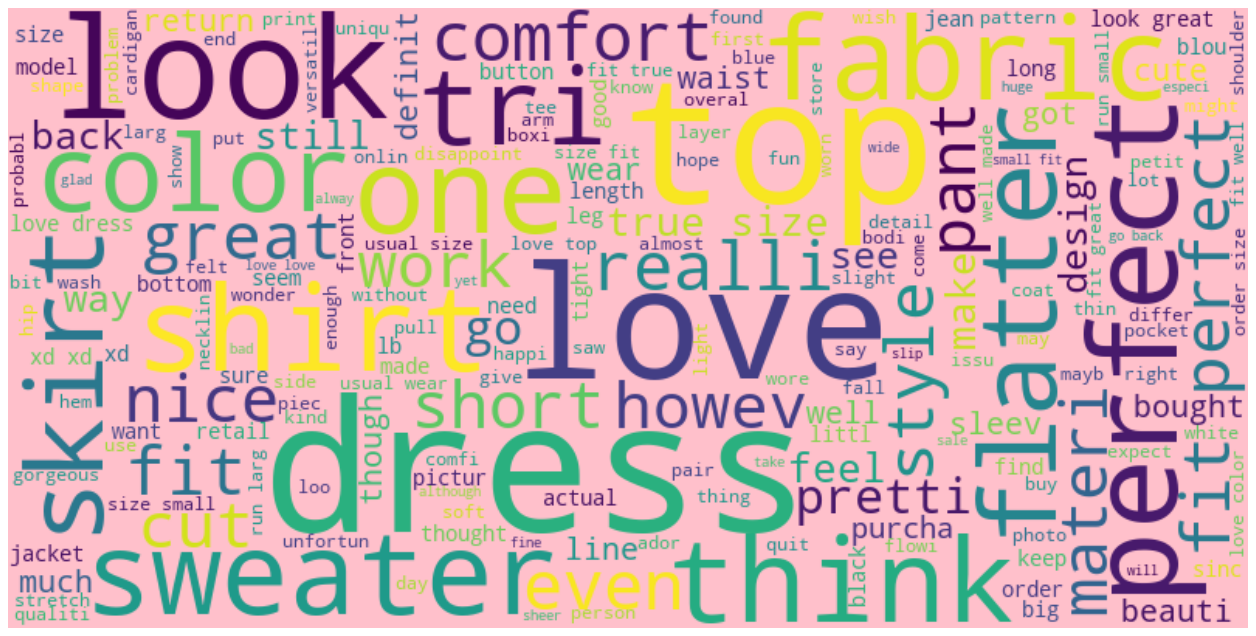

In [41]:
wordcloud=WordCloud(width=800,height=400,random_state = 21,
                      max_font_size= 119,background_color='pink').generate(words_all)
plt.figure(figsize=(20,20),dpi= 80)
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [42]:
#vectorizing
vec=TfidfVectorizer()

In [43]:
tf_df=vec.fit_transform(review_data['Review Text'])

In [44]:
tf_df

<22641x12782 sparse matrix of type '<class 'numpy.float64'>'
	with 604695 stored elements in Compressed Sparse Row format>

In [45]:
tfidf_vect = pd.DataFrame(tf_df.toarray(),columns=sorted(vec.vocabulary_.keys()))
tfidf_vect.head()

aa  aaaaaaamaz  aaaaandidontwanttopayforship  aaaaannnnnnd  aaaah  \
0  0.0         0.0                           0.0           0.0    0.0   
1  0.0         0.0                           0.0           0.0    0.0   
2  0.0         0.0                           0.0           0.0    0.0   
3  0.0         0.0                           0.0           0.0    0.0   
4  0.0         0.0                           0.0           0.0    0.0   

   aaaahmaz  aaah  aam   ab  abbey  ...  zipepr  ziphoodi  ziploc    zipper  \
0       0.0   0.0  0.0  0.0    0.0  ...     0.0       0.0     0.0  0.000000   
1       0.0   0.0  0.0  0.0    0.0  ...     0.0       0.0     0.0  0.000000   
2       0.0   0.0  0.0  0.0    0.0  ...     0.0       0.0     0.0  0.130055   
3       0.0   0.0  0.0  0.0    0.0  ...     0.0       0.0     0.0  0.000000   
4       0.0   0.0  0.0  0.0    0.0  ...     0.0       0.0     0.0  0.000000   

   zippi  zombi  zone  zooland  zoom  zuma  
0    0.0    0.0   0.0      0.0   0.0   0.0  
1    0.0    0.0   0.0      0.0   0.0   0.0  
2    0.0    0.0   0.0      0.0   0.0   0.0  
3    0.0    0.0   0.0      0.0   0.0   0.0  
4    0.0    0.0   0.0      0.0   0.0   0.0  

[5 rows x 12782 columns]

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
review_data['Sentiments'] = le.fit_transform(review_data['Sentiments'])


In [47]:
x=tfidf_vect
y=review_data['Sentiments']

### Train_Test_split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,stratify=y)

In [51]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((18112, 12782), (4529, 12782), (18112,), (4529,))

## Model Building

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [54]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [55]:
dt_predict=dt.predict(test_x)

In [56]:
accuracy_score(test_y,dt_predict)

0.7222344888496357

In [57]:
print(classification_report(test_y,dt_predict))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32       474
           1       0.23      0.23      0.23       565
           2       0.85      0.86      0.85      3490

    accuracy                           0.72      4529
   macro avg       0.47      0.47      0.47      4529
weighted avg       0.72      0.72      0.72      4529



In [58]:
rm=RandomForestClassifier()
rm.fit(train_x,train_y)

RandomForestClassifier()

In [59]:
rm_pred=rm.predict(test_x)

In [60]:
accuracy_score(test_y,rm_pred)

0.7840582910134688

In [61]:
print(classification_report(test_y,rm_pred))

              precision    recall  f1-score   support

           0       0.81      0.12      0.20       474
           1       0.44      0.01      0.02       565
           2       0.78      1.00      0.88      3490

    accuracy                           0.78      4529
   macro avg       0.68      0.38      0.37      4529
weighted avg       0.74      0.78      0.70      4529



### Topic Modelling

In [180]:
review_data

Review Text  Sentiments
0                     absolut wonder  silki sexi comfort           2
1      love dress  sooo pretti   happen find store i ...           2
2      high hope dress realli want work me  initi ord...           1
3      love love love jumpsuit  fun flirti fabul ever...           2
4      shirt flatter due adjust front tie  perfect le...           2
...                                                  ...         ...
23481  happi snag dress great price easi slip flatter...           2
23482  remind matern cloth  soft stretchi shini mater...           1
23483  fit well top see through  never would work me ...           1
23484  bought dress wed summer cute  unfortun fit per...           1
23485  dress love platinum feminin fit perfect easi w...           2

[22641 rows x 2 columns]

In [246]:
postive_doc=list(review_data[review_data['Sentiments']==2]['Review Text'].values)

In [66]:
!pip install cython

In [67]:
!pip install gensim

In [132]:
import gensim

In [134]:
from gensim import corpora

In [248]:
postive_doc = [sent.split(' ')  for sent in postive_doc ]

In [250]:
postive_doc_=[]
for s in postive_doc:
    s1  = []
    for w in s:
        if(len(w)>2):
            s1.append(w)
    postive_doc_.append(s1)

In [252]:
postive_doc_[:6]

[['absolut', 'wonder', 'silki', 'sexi', 'comfort'],
 ['love',
  'dress',
  'sooo',
  'pretti',
  'happen',
  'find',
  'store',
  'glad',
  'becaus',
  'never',
  'would',
  'order',
  'onlin',
  'becaus',
  'petit',
  'bought',
  'petit',
  'love',
  'length',
  'hit',
  'littl',
  'knee',
  'would',
  'definit',
  'true',
  'midi',
  'someon',
  'truli',
  'petit'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirti',
  'fabul',
  'everi',
  'time',
  'wear',
  'get',
  'noth',
  'great',
  'compliment'],
 ['shirt',
  'flatter',
  'due',
  'adjust',
  'front',
  'tie',
  'perfect',
  'length',
  'wear',
  'leg',
  'sleeveless',
  'pair',
  'well',
  'cardigan',
  'love',
  'shirt'],
 ['ade',
  'basket',
  'hte',
  'last',
  'mintu',
  'see',
  'would',
  'look',
  'like',
  'person',
  'store',
  'pick',
  'went',
  'teh',
  'darkler',
  'color',
  'pale',
  'hte',
  'color',
  'realli',
  'gorgeous',
  'turn',
  'mathc',
  'everythi',
  'tri',
  'prefect',
  'littl',
  '

In [254]:
postive_dic=corpora.Dictionary(postive_doc_)

In [256]:
postive_dic

In [269]:
doc_term_matrix=[postive_dic.doc2bow(d) for d in postive_doc_]

In [271]:
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 3),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2)],
 [(16, 3),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(14, 1),
  (16, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(15, 1),
  (21, 1),
  (25, 1),
  (28, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 4),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  

In [262]:
from gensim.models.ldamodel import LdaModel

In [264]:
lda = LdaModel

In [273]:
matrix = lda(doc_term_matrix,num_topics=5,id2word=postive_dic)

In [275]:
matrix.print_topics(num_words=5)

[(0,
  '0.032*"love" + 0.020*"dress" + 0.019*"color" + 0.018*"top" + 0.018*"wear"'),
 (1,
  '0.025*"size" + 0.022*"dress" + 0.022*"fit" + 0.021*"top" + 0.018*"wear"'),
 (2, '0.025*"jean" + 0.023*"pant" + 0.019*"look" + 0.017*"leg" + 0.017*"fit"'),
 (3,
  '0.027*"look" + 0.024*"dress" + 0.019*"like" + 0.012*"love" + 0.012*"would"'),
 (4,
  '0.043*"size" + 0.032*"fit" + 0.020*"order" + 0.018*"dress" + 0.016*"love"')]

In [238]:
negative_doc=list(review_data[review_data['Sentiments']==0]['Review Text'].values)

In [240]:
negative_doc = [sent.split(' ')  for sent in negative_doc ]

In [242]:
negative_doc_=[]
for s in negative_doc:
    s1  = []
    for w in s:
        if(len(w)>2):
            s1.append(w)
    negative_doc_.append(s1)
matrix = lda(doc_term_matrix,num_topics=5)

In [277]:
negative_dic=corpora.Dictionary(negative_doc_)

In [279]:
negative_dic

In [281]:
doc_term_matrix=[negative_dic.doc2bow(d) for d in negative_doc_]

In [283]:
matrix2 = lda(doc_term_matrix,num_topics=5,id2word=negative_dic)

In [285]:
matrix2.print_topics(num_words=5)

[(0,
  '0.017*"look" + 0.013*"would" + 0.013*"dress" + 0.011*"fabric" + 0.011*"like"'),
 (1,
  '0.036*"dress" + 0.019*"love" + 0.015*"fabric" + 0.014*"look" + 0.011*"like"'),
 (2, '0.017*"look" + 0.016*"like" + 0.016*"size" + 0.014*"fit" + 0.014*"top"'),
 (3,
  '0.031*"look" + 0.015*"like" + 0.014*"shirt" + 0.011*"dress" + 0.011*"fit"'),
 (4,
  '0.029*"dress" + 0.024*"like" + 0.021*"size" + 0.020*"look" + 0.018*"top"')]